In [ ]:
import numpy as np

# Génération de données pour XOR
X = np.random.randint(0, 2, (300, 2))  # 300 points avec des valeurs aléatoires de 0 ou 1 pour les caractéristiques
y = np.logical_xor(X[:, 0], X[:, 1]).reshape(-1, 1)  # Étiquettes correspondant au XOR des deux caractéristiques

# Pourcentage de données pour le test
test_split = 0.2
num_test_samples = int(test_split * len(X))

# Mélanger les données
indices = np.random.permutation(len(X))
X, y = X[indices], y[indices]

# Séparer les données d'entraînement et de test
X_train, y_train = X[num_test_samples:], y[num_test_samples:]
X_test, y_test = X[:num_test_samples], y[:num_test_samples]

# Affichage des dimensions des données
print("Dimensions de X_train:", X_train.shape)
print("Dimensions de y_train:", y_train.shape)
print("Dimensions de X_test:", X_test.shape)
print("Dimensions de y_test:", y_test.shape)


Dimensions de X_train: (240, 2)
Dimensions de y_train: (240, 1)
Dimensions de X_test: (60, 2)
Dimensions de y_test: (60, 1)


In [ ]:
class NN:
    def __init__(self, epochs=1000, learning_rate=0.1):
        self.epochs = epochs
        self.learning_rate = learning_rate

    def fit(self, X, y, layers):
        self.layers = layers
        self.weights = []
        self.biases = []

        for i in range(len(layers) - 1):
            self.weights.append(np.random.randn(layers[i], layers[i+1]))
            self.biases.append(np.random.randn(layers[i+1]))

        for epoch in range(self.epochs):
            for i in range(len(X)):
                # Forward propagation
                activations = [X[i]]
                for j in range(len(layers) - 1):
                    activations.append(self.sigmoid(np.dot(activations[j], self.weights[j]) + self.biases[j]))

                # Backpropagation
                error = y[i] - activations[-1]
                deltas = [error * self.sigmoid_derivative(activations[-1])]
                for j in range(len(layers) - 2, 0, -1):
                    deltas.append(np.dot(deltas[-1], self.weights[j].T) * self.sigmoid_derivative(activations[j]))

                deltas.reverse()

                # Update weights and biases
                for j in range(len(layers) - 1):
                    self.weights[j] += self.learning_rate * np.dot(activations[j].reshape(-1, 1), deltas[j].reshape(1, -1))
                    self.biases[j] += self.learning_rate * deltas[j]

    def predict(self, X):
        activations = [X]
        for j in range(len(self.layers) - 1):
            activations.append(self.sigmoid(np.dot(activations[j], self.weights[j]) + self.biases[j]))
        return activations[-1]

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)


In [ ]:
def accuracy(y_true, y_pred):
    correct = 0
    for true, pred in zip(y_true, y_pred):
        if np.array_equal(true, np.round(pred)):
            correct += 1
    return correct / len(y_true)


In [ ]:
# Génération de données pour XOR généralisé
# Séparer les données d'entraînement et de test
X_train, y_train = X[num_test_samples:], y[num_test_samples:]
X_test, y_test = X[:num_test_samples], y[:num_test_samples]


In [ ]:
# Création et entraînement du modèle
model = NN()
model.fit(X_train, y_train, layers=[2, 3, 1])


In [ ]:
# Prédiction et évaluation
y_pred = model.predict(X_test)
acc = accuracy(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 1.0


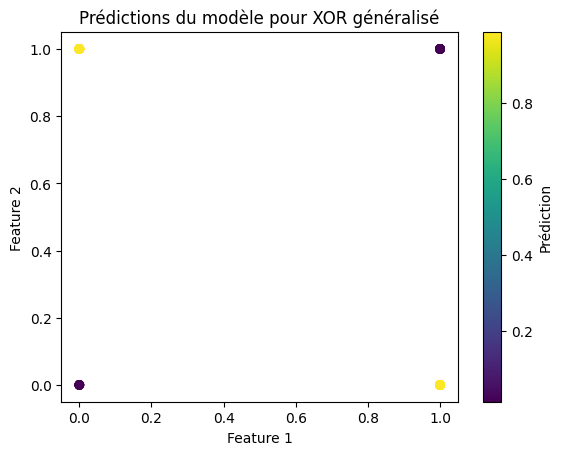

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:,0], X_test[:,1], c=y_pred.flatten(), cmap='viridis')
plt.title('Prédictions du modèle pour XOR généralisé')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Prédiction')
plt.show()
